<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>K-Nearest Neighbors (KNN)</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
knn.predict(X_test)

array([0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1,
       2])

In [7]:
knn.score(X_test, y_test)

0.9777777777777777

## Drawing for differents K:

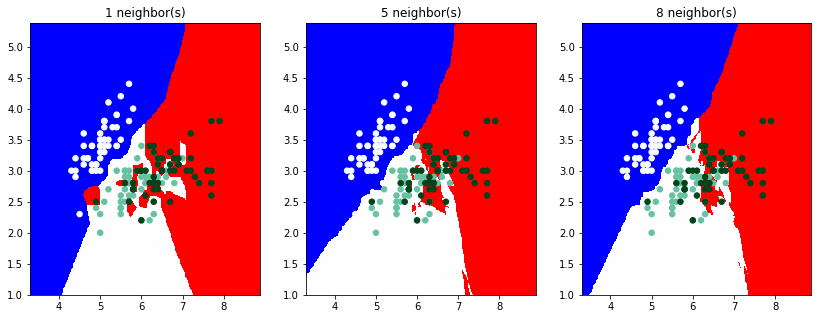

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
res = 0.02
X2D = X[:,[0,1]]

x1min, x1max = X2D[:,0].min() -1, X2D[:,0].max() + 1
x2min, x2max = X2D[:,1].min() -1, X2D[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

for n, ax in zip([1, 5, 8], axs):
    knn = KNN(n_neighbors=n).fit(X2D, y)
    output = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    ax.pcolormesh(xx1,xx2, output, cmap=plt.cm.bwr)
    ax.scatter(X2D[:,0], X2D[:,1], c=y, s=30, cmap=plt.cm.BuGn)
    ax.set_title("%d neighbor(s)" % n)

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html